In [22]:
import GPy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

import time

In [23]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

X=df1.drop("Strength",axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=X[:900],X[900::],Y[:900],Y[900::]


In [24]:

#Cement
K1=GPy.kern.Matern32(1,ARD=True,variance=4169.465933438534,lengthscale=1549.9147563919944,active_dims=[0])

#Blast_Furance
k1=GPy.kern.PeriodicExponential(1,variance=9.361692650954631e-07,lengthscale=147.2139294986865,period=19.101741117437783,active_dims=[1])
k2=GPy.kern.RBF(1,ARD=True,variance=189.65509369615947,lengthscale=214.5073292829563,active_dims=[1])
k3=GPy.kern.Matern32(1,ARD=True,variance=112.94406169745655,lengthscale=1.3663048254769852e-95,active_dims=[1])
K2=k1+k2+k3


#Fly_ash
k4=GPy.kern.RBF(1,ARD=True,variance=1221.6749702362074,lengthscale=1132.6018572227545,active_dims=[2])
k5=GPy.kern.Matern32(1,ARD=True,variance=11.712243768585925,lengthscale=0.058175069229113856,active_dims=[2])

K3=k4+k5

#water
K4=GPy.kern.Exponential(1,ARD=True,variance=1445.9271756267851,lengthscale=50.55227037981031,active_dims=[3])


#Superplasticizer
k6=GPy.kern.RBF(1,ARD=True,variance=1304.0943832273217,lengthscale=50.9404018497552,active_dims=[4])
k7=GPy.kern.Matern32(1,ARD=True,variance=1164.1031437031368,lengthscale=327.4938419600094,active_dims=[4])
k8=GPy.kern.Exponential(1,ARD=True,variance=49.39428716580325,lengthscale=1.2396576667342685e-11,active_dims=[4])
K5=k6+k7+k8


# coarse aggregate
K6=GPy.kern.Linear(1,ARD=True,variances=0.001338907851601497,active_dims=[5])


# fine aggregrate
k9=GPy.kern.RatQuad(1,ARD=True,variance=1185.4575468073592,lengthscale=0.08254820314509405,power=3.9762096123034e-55,active_dims=6)
k10=GPy.kern.Matern32(1,ARD=True,variance=101.32714527577565,lengthscale=	1.759107268443224e-27,active_dims=[6])

K7=k9+k10

#Age
K8=GPy.kern.PeriodicExponential(1,variance=197.98490097302098,lengthscale=0.3662920954077468,period=9.733693649716308,active_dims=[7])


 C:\Users\uamit\Anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


In [25]:
KERNAL=K1+K2+K3+K4+K5+K6+K7+K8

In [26]:
main=GPy.models.GPRegression(X_train,Y_train,kernel=KERNAL)
main

GP_regression.,value,constraints,priors
sum.Mat32.variance,4169.465933438534,+ve,
sum.Mat32.lengthscale,1549.9147563919944,+ve,
sum.periodic_exponential.variance,9.361692650954631e-07,+ve,
sum.periodic_exponential.lengthscale,147.2139294986865,+ve,
sum.periodic_exponential.period,19.101741117437783,+ve,
sum.rbf.variance,189.65509369615947,+ve,
sum.rbf.lengthscale,214.5073292829563,+ve,
sum.Mat32_1.variance,112.94406169745655,+ve,
sum.Mat32_1.lengthscale,1.3663048254769852e-95,+ve,
sum.rbf_1.variance,1221.6749702362074,+ve,


In [27]:
st=time.time()
main.optimize(messages=True)

en = time.time()
print('Time taken = {:.2f} seconds'.format(en-st))
main

Time taken = 103.77 seconds


GP_regression.,value,constraints,priors
sum.Mat32.variance,4169.494375977231,+ve,
sum.Mat32.lengthscale,1549.7579052182289,+ve,
sum.periodic_exponential.variance,9.326123635900449e-07,+ve,
sum.periodic_exponential.lengthscale,147.21395312579432,+ve,
sum.periodic_exponential.period,19.073646309254944,+ve,
sum.rbf.variance,189.33368381765763,+ve,
sum.rbf.lengthscale,215.37883358272546,+ve,
sum.Mat32_1.variance,66.04697919593809,+ve,
sum.Mat32_1.lengthscale,1.3663048254769852e-95,+ve,
sum.rbf_1.variance,1221.628117490389,+ve,


In [28]:
mean,variance=main.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,mean.reshape(-1,1))))
mean1,variance1=main.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,mean1.reshape(-1,1))))


3.787737195201061
5.477313270855048


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


ridge=Ridge(alpha=1)
linear=LinearRegression()

linear.fit(X_train,Y_train)
ridge.fit(X_train,Y_train)

prediction_linear1=linear.predict(X_train)
prediction1=ridge.predict(X_train)
print("for ridge training :",np.sqrt(mean_squared_error(Y_train,prediction1)))
print("for linear training :",np.sqrt(mean_squared_error(Y_train,prediction_linear1)))


prediction_linear=ridge.predict(X_test)
prediction=ridge.predict(X_test)
print("for ridge test :",np.sqrt(mean_squared_error(Y_test,prediction)))
print("for linear test :",np.sqrt(mean_squared_error(Y_test,prediction_linear)))

for ridge training : 10.703553397006646
for linear training : 10.703553396635884
for ridge test : 7.77920530176781
for linear test : 7.77920530176781


# running matern with ARD on for entire dataset and time stamp on

Time taken = 44.34 seconds
training error= 2.8349910129807316
test error= 5.301972258490346


Text(0.5, 1.0, 'ARD when only Matern32 function was applied to all features')

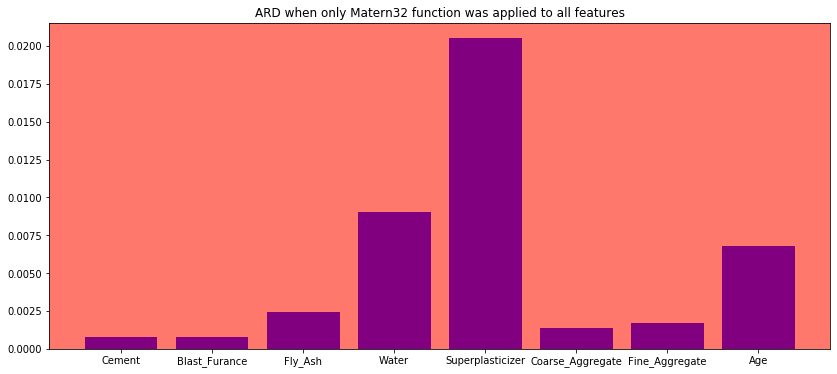

In [29]:
st=time.time()
k1=GPy.kern.Matern32(8,ARD=True,active_dims=[0,1,2,3,4,5,6,7])
mod=GPy.models.GPRegression(X_train,Y_train,k1)
mod.optimize(messages=True)
en = time.time()
print('Time taken = {:.2f} seconds'.format(en-st))

mean,variance=mod.predict(X_train)
mean1,variance1=mod.predict(X_test)
print("training error=",np.sqrt(mean_squared_error(Y_train,mean)))
print("test error=",np.sqrt(mean_squared_error(Y_test,mean1)))

relvec = 1/np.array(mod.kern.lengthscale)
fig = plt.figure(figsize=(14,6))
ax = plt.subplot(111)
names=df1.columns
ax.bar(np.array(np.arange(8)),relvec,color="purple")
ax.set_xticks(np.array(np.arange(8)))
xn = ax.set_xticklabels(names)
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((1.0, 0.47, 0.42))

plt.title("ARD when only Matern32 function was applied to all features")


# running RBF with ARD on for entire dataset and time stamp on

Time taken = 30.08 seconds
training error= 3.3083462632187763
test error= 5.566599129924104


Text(0.5, 1.0, 'ARD when only RBF function was applied to all features')

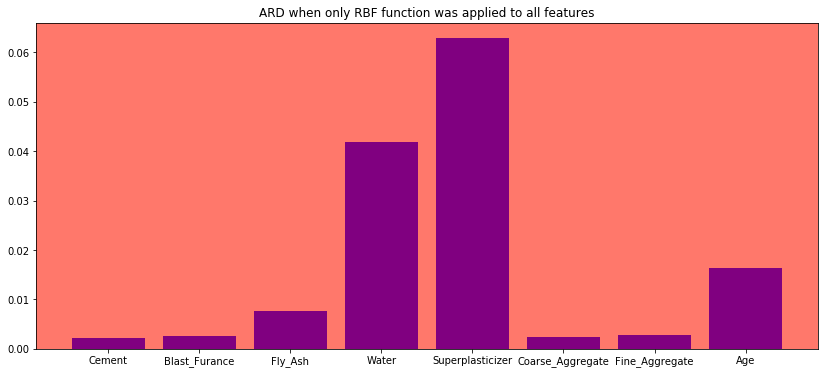

In [30]:
st=time.time()
k1=GPy.kern.RBF(8,ARD=True,active_dims=[0,1,2,3,4,5,6,7])
mod=GPy.models.GPRegression(X_train,Y_train,k1)
mod.optimize(messages=True)
en = time.time()
print('Time taken = {:.2f} seconds'.format(en-st))

mean,variance=mod.predict(X_train)
mean1,variance1=mod.predict(X_test)
print("training error=",np.sqrt(mean_squared_error(Y_train,mean)))
print("test error=",np.sqrt(mean_squared_error(Y_test,mean1)))

relvec = 1/np.array(mod.kern.lengthscale)
fig = plt.figure(figsize=(14,6))
ax = plt.subplot(111)
names=df1.columns
ax.bar(np.array(np.arange(8)),relvec,color="purple")
ax.set_xticks(np.array(np.arange(8)))
xn = ax.set_xticklabels(names)
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((1.0, 0.47, 0.42))

plt.title("ARD when only RBF function was applied to all features")

In [11]:
"""
st=time.time()
k1=GPy.kern.Matern32(7,ARD=True,active_dims=[0,1,2,3,4,5,6])
mod=GPy.models.GPRegression(X_train,Y_train,k1)
mod.optimize(messages=True)
en = time.time()
print('Time taken = {:.2f} seconds'.format(en-st))

mean,variance=mod.predict(X_train)
mean1,variance1=mod.predict(X_test)
print("training error=",np.sqrt(mean_squared_error(Y_train,mean)))
print("test error=",np.sqrt(mean_squared_error(Y_test,mean1)))

"""

'\nst=time.time()\nk1=GPy.kern.Matern32(7,ARD=True,active_dims=[0,1,2,3,4,5,6])\nmod=GPy.models.GPRegression(X_train,Y_train,k1)\nmod.optimize(messages=True)\nen = time.time()\nprint(\'Time taken = {:.2f} seconds\'.format(en-st))\n\nmean,variance=mod.predict(X_train)\nmean1,variance1=mod.predict(X_test)\nprint("training error=",np.sqrt(mean_squared_error(Y_train,mean)))\nprint("test error=",np.sqrt(mean_squared_error(Y_test,mean1)))\n\n'

Time taken = 34.95 seconds
training error= 2.8711994859499077
test error= 12.15120240430396


Text(0.5, 1.0, 'ARD when only Matern32 function was applied to all features')

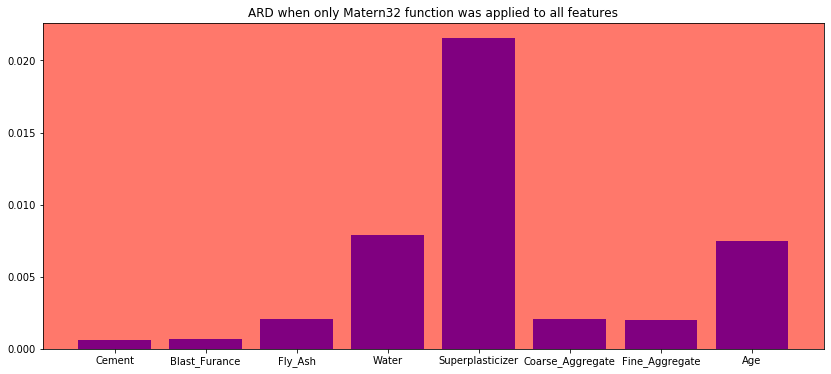

In [12]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

name=["Cement","Blast_Furance","Fly_Ash","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age"]


X=df1.drop(["Strength"],axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=X[:700],X[700::],Y[:700],Y[700::]


st=time.time()
k1=GPy.kern.Matern32(8,ARD=True,active_dims=[0,1,2,3,4,5,6,7])
mod=GPy.models.GPRegression(X_train,Y_train,k1)
mod.optimize(messages=True)
en = time.time()
print('Time taken = {:.2f} seconds'.format(en-st))

mean,variance=mod.predict(X_train)
mean1,variance1=mod.predict(X_test)
print("training error=",np.sqrt(mean_squared_error(Y_train,mean)))
print("test error=",np.sqrt(mean_squared_error(Y_test,mean1)))

relvec = 1/np.array(mod.kern.lengthscale)
fig = plt.figure(figsize=(14,6))
ax = plt.subplot(111)
names=df1.columns
ax.bar(np.array(np.arange(8)),relvec,color="purple")
ax.set_xticks(np.array(np.arange(8)))
xn = ax.set_xticklabels(names)
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((1.0, 0.47, 0.42))

plt.title("ARD when only Matern32 function was applied to all features")


Time taken = 24.55 seconds
training error= 3.3152732457580676
test error= 13.769431089002744


Text(0.5, 1.0, 'ARD when only RBF function was applied to all features')

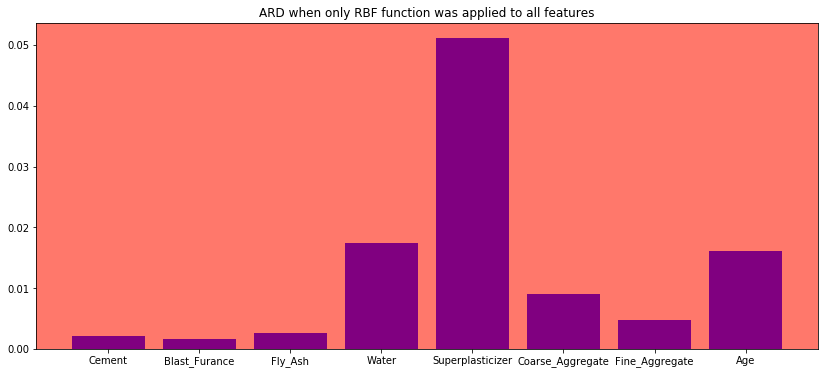

In [13]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

name=["Cement","Blast_Furance","Fly_Ash","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age"]


X=df1.drop(["Strength"],axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=X[:700],X[700::],Y[:700],Y[700::]


st=time.time()
k1=GPy.kern.RBF(8,ARD=True,active_dims=[0,1,2,3,4,5,6,7])
mod=GPy.models.GPRegression(X_train,Y_train,k1)
mod.optimize(messages=True)
en = time.time()
print('Time taken = {:.2f} seconds'.format(en-st))

mean,variance=mod.predict(X_train)
mean1,variance1=mod.predict(X_test)
print("training error=",np.sqrt(mean_squared_error(Y_train,mean)))
print("test error=",np.sqrt(mean_squared_error(Y_test,mean1)))

relvec = 1/np.array(mod.kern.lengthscale)
fig = plt.figure(figsize=(14,6))
ax = plt.subplot(111)
names=df1.columns
ax.bar(np.array(np.arange(8)),relvec,color="purple")
ax.set_xticks(np.array(np.arange(8)))
xn = ax.set_xticklabels(names)
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((1.0, 0.47, 0.42))

plt.title("ARD when only RBF function was applied to all features")


Time taken = 33.68 seconds
training error= 4.033480411328726
test error= 11.551969378077509


Text(0.5, 1.0, 'ARD when only RBF function was applied to all features')

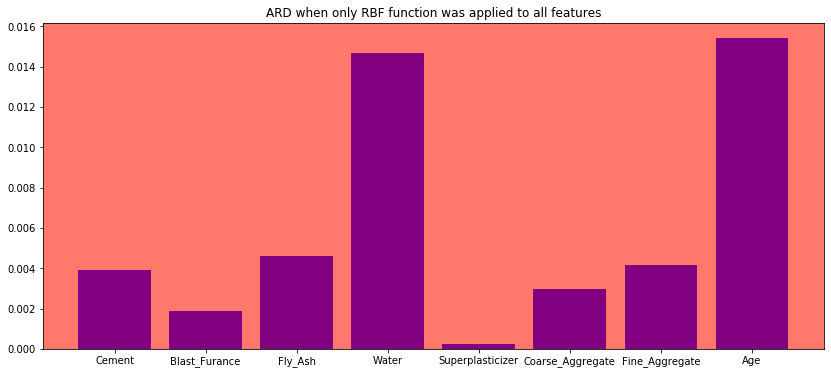

In [14]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

name=["Cement","Blast_Furance","Fly_Ash","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age"]


X=df1.drop(["Strength"],axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=X[:500],X[500::],Y[:500],Y[500::]


st=time.time()
k1=GPy.kern.RBF(8,ARD=True,active_dims=[0,1,2,3,4,5,6,7])
mod=GPy.models.GPRegression(X_train,Y_train,k1)
mod.optimize(messages=True)
en = time.time()
print('Time taken = {:.2f} seconds'.format(en-st))

mean,variance=mod.predict(X_train)
mean1,variance1=mod.predict(X_test)
print("training error=",np.sqrt(mean_squared_error(Y_train,mean)))
print("test error=",np.sqrt(mean_squared_error(Y_test,mean1)))

relvec = 1/np.array(mod.kern.lengthscale)
fig = plt.figure(figsize=(14,6))
ax = plt.subplot(111)
names=df1.columns
ax.bar(np.array(np.arange(8)),relvec,color="purple")
ax.set_xticks(np.array(np.arange(8)))
xn = ax.set_xticklabels(names)
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((1.0, 0.47, 0.42))

plt.title("ARD when only RBF function was applied to all features")
